In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# here paths to the dataset
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [3]:
#here we import the dataset from the paths in my case lion & girffe
import os
print(len(os.listdir('/content/drive/MyDrive/train/lion')))
print(len(os.listdir('/content/drive/MyDrive/train/giraffe')))
print(len(os.listdir('/content/drive/MyDrive/test/lion')))
print(len(os.listdir('/content/drive/MyDrive/test/giraffe')))

766
608
50
50


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary', # 'binary' for binary classification (lion vs. giraffe)
    subset='training'    # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2     # here we use the same split of training set which is 20%
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'   # Specify 'validation' for the validation set
)

Found 1100 images belonging to 3 classes.
Found 274 images belonging to 3 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()         # we used ResNet50 as the pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 4s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
35/35 [==============================] - 521s 15s/step - loss: -194.2915 - accuracy: 0.4282 - val_loss: -483.0777 - val_accuracy: 0.4416
Epoch 2/3
35/35 [==============================] - 356s 10s/step - loss: -966.0742 - accuracy: 0.4427 - val_loss: -1650.4395 - val_accuracy: 0.4416
Epoch 3/3
35/35 [==============================] - 364s 10s/step - loss: -2557.1409 - accuracy: 0.4427 - val_loss: -3695.2322 - val_accuracy: 0.4416


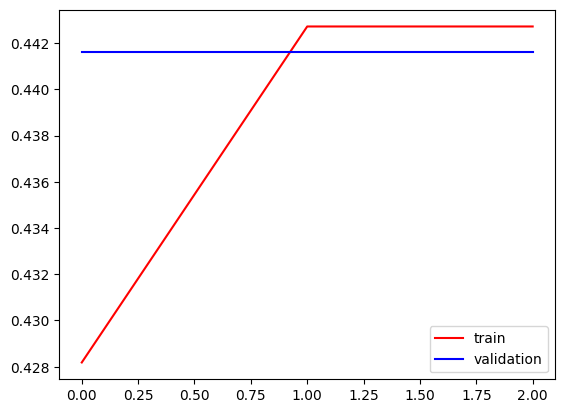

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

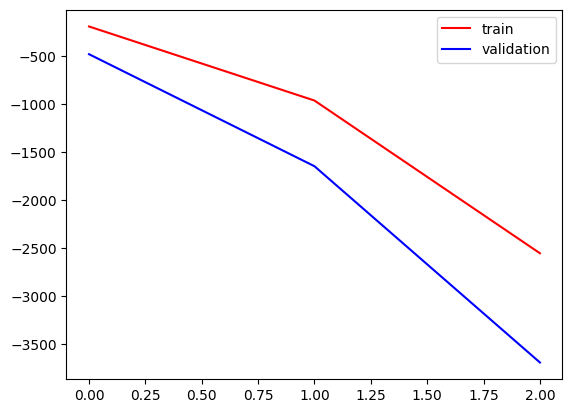

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 3 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 53s 15s/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [13]:
len(predictions)

100

In [14]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # here we adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[50  0]
 [50  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67        50
           2       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [16]:
# here paths to the dataset
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [17]:
#here we import the dataset from the paths in my case lion & girffe
import os
print(len(os.listdir('/content/drive/MyDrive/train/lion')))
print(len(os.listdir('/content/drive/MyDrive/train/giraffe')))
print(len(os.listdir('/content/drive/MyDrive/test/lion')))
print(len(os.listdir('/content/drive/MyDrive/test/giraffe')))

766
608
50
50


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary', # 'binary' for binary classification (lion vs. giraffe)
    subset='training'    # Specify 'training' for the training set
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # here we use the same split of training set which is 20%
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'   # Specify 'validation' for the validation set
)

Found 1100 images belonging to 3 classes.
Found 274 images belonging to 3 classes.


In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [20]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid')) #output layer

In [21]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [22]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
35/35 [==============================] - 175s 5s/step - loss: -240599.0469 - accuracy: 0.4427 - val_loss: -1902604.5000 - val_accuracy: 0.4416
Epoch 2/30
35/35 [==============================] - 168s 5s/step - loss: -58462400.0000 - accuracy: 0.4427 - val_loss: -250830576.0000 - val_accuracy: 0.4416
Epoch 3/30
35/35 [==============================] - 171s 5s/step - loss: -1905417728.0000 - accuracy: 0.4427 - val_loss: -5775589376.0000 - val_accuracy: 0.4416
Epoch 4/30
35/35 [==============================] - 167s 5s/step - loss: -22018064384.0000 - accuracy: 0.4427 - val_loss: -54769410048.0000 - val_accuracy: 0.4416
Epoch 5/30
35/35 [==============================] - 167s 5s/step - loss: -153701105664.0000 - accuracy: 0.4427 - val_loss: -313316671488.0000 - val_accuracy: 0.4416
Epoch 6/30
35/35 [==============================] - 162s 5s/step - loss: -716008325120.0000 - accuracy: 0.4427 - val_loss: -1278722965504.0000 - val_accuracy: 0.4416
Epoch 7/30
35/35 [===============

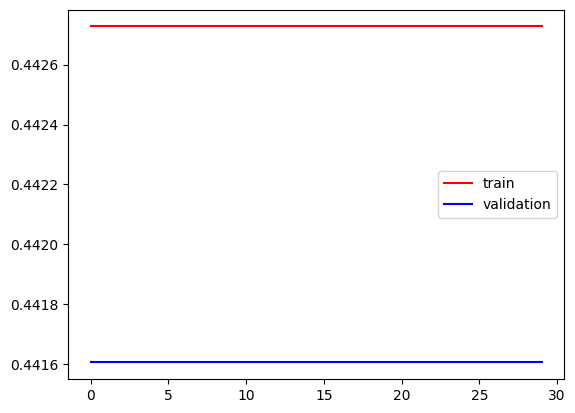

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

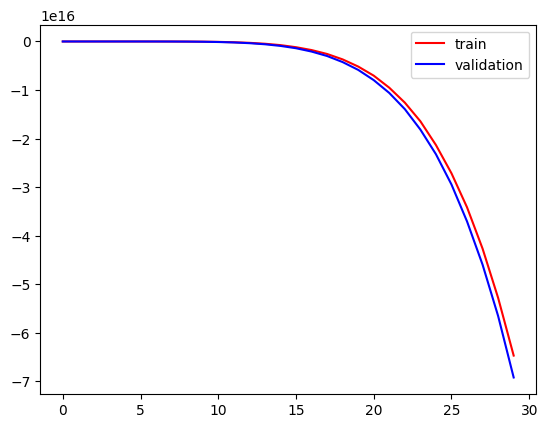

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 3 classes.


In [26]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 4s 744ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [27]:
len(predictions)

100

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int) # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)


# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[50  0]
 [50  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67        50
           2       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
